In [2]:
#standard imports 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [3]:
url='https://raw.githubusercontent.com/wkrzemien/dataScienceAndML2020/master/datasets/iris_data.csv'
urllib.request.urlretrieve(url,'iris_data.csv')
input_file = 'iris_data.csv'
data = pd.read_csv(input_file)

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataSetosa=data[data['species']=='Iris-setosa']
dataVersicolor=data[data['species']=='Iris-versicolor']
dataVirginica=data[data['species']=='Iris-virginica']
datasets =[dataSetosa,dataVersicolor,dataVirginica]

In [6]:
def plotDatasets(datasets, dataSetsLabels, columnsToPlot=None, xLabel='x', yLabel='y', ):
    colors = ['red','green','blue'] 
    if not columnsToPlot:
        columnsToPlot = [0, 1]
    for d, dlabel, color in zip(datasets, dataSetsLabels, colors):
        xdata = d.iloc[:, columnsToPlot[0]]
        ydata = d.iloc[:, columnsToPlot[1]]
        plt.scatter(xdata, ydata, label=dlabel, color = color)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
    plt.legend()
    plt.show()

In [7]:
dLabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

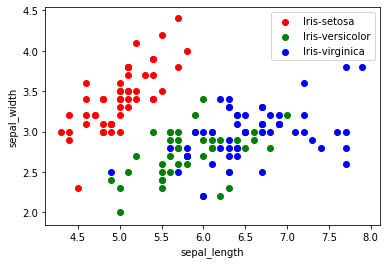

In [8]:
plotDatasets(datasets, dLabels, [0, 1], 'sepal_length', 'sepal_width')

In [9]:
def distance(x,y):
    d = 0
    for i in range(2):
        d = d + math.pow(x[i]- y[i], 2)
    d = math.sqrt(d)
    return d

In [10]:
from operator import itemgetter

def getNeighbours(x, Xtrain, Ytrain, metric=distance): 
    #assing position of main point given by x
    ManiPoint =[x[0], x[1]]
    ListToReturn = []
    for i in range(0, len(Ytrain)):
        tempPoint = [ Xtrain[i][0], Xtrain[i][1]]
        DIST = distance(ManiPoint,tempPoint)
        Temp = [DIST, Xtrain[i][0], Xtrain[i][1], Ytrain[i]]
        ListToReturn.append(Temp)
    
    #now we have data poinst with distance only thing left is to sort them by distance   
    resultList = sorted(ListToReturn, key = itemgetter(0))
    #print(resultList)
    return resultList

In [11]:
def getKNNeighbours(neighbours, k):
    KNNeighbours = []
    for i in range(k):
        KNNeighbours.append(neighbours[i])
    return KNNeighbours

In [12]:
def majorityVote(neighbours):
    #we are counting how many neigbouts of given type we have
    suma = 0
    for i in range(0, len(neighbours)):
        suma = suma + neighbours[i][3]
    suma = suma/len(neighbours)
    return suma

In [41]:
def meanSquaredError(v, w):
    MSE = 0
    for i in range(0, len(v)):
         MSE = MSE + math.pow(v[i] - w[i], 2)
    MSE = MSE/len(v)
    return MSE

In [14]:
def predict(x, Xtrain, Ytrain, k):
    neighbours = getNeighbours(x, Xtrain, Ytrain, metric=distance)
    #print(neighbours)
    neighboursSorted = getKNNeighbours(neighbours, k)
    #print(neighboursSorted)
    prediction = majorityVote(neighboursSorted)
    #print(prediction)
    return prediction

def predictList(xObjects, Xtrain, Ytrain, k):
    fakePredictions = []
    for i in range(0, len(xObjects)):
        fakePredictions.append(predict(xObjects[i], Xtrain, Ytrain, k))
    
    return fakePredictions

In [15]:
def plotErrors(x, train,valid):
    plt.plot(x, train, label='training error')
    plt.plot(x, valid, label='test error')
    plt.xlabel('k')
    plt.legend()
    plt.show()
    #plt.savefig('errors.png') #save figure to file

In [16]:
def divideData(dataSet, fraction):
    nbTotal = len(ddataSet.index)
    nbTrain = int(nbTotal*fraction)
    return (dataSet.iloc[:nbTrain,:], dataSet.iloc[nbTrain:,:])

In [17]:
def runTests():
    # some tests of distance function
    
    #WARNING intoduced small changes how data is stored
    
    np.testing.assert_almost_equal(distance([1, 1], [1, 1]), 0)
    np.testing.assert_almost_equal(distance([2, 0, 1], [5, 0, 1]), 3)
    np.testing.assert_almost_equal(distance([0, 0], [2, 2]), np.sqrt(8))

    # some tests of getNeighbours function
    Xtrain = [[2, 0], [0, 0],  [1, 0]]
    Ytrain = [1, 0, 1]
    x = [-1, 0]  # with respect to x we calculate the distance
    result = getNeighbours(x, Xtrain, Ytrain)

     # some tests of getKNNeighbours function
    data = [[1, 0, 0, 0], [2, 1, 0, 1], [3, 2, 0, 1]]
    np.testing.assert_equal(getKNNeighbours(data,  k=1), [[1, 0, 0, 0]])
    np.testing.assert_equal(getKNNeighbours(data,  k=2), [[1, 0, 0, 0], [2, 1, 0, 1]])
    
    # some tests of majorityVote function
    data = [[1, 0, 0, 0], [2, 1, 0, 1], [3, 2, 0, 1]]
    np.testing.assert_equal(majorityVote(data), 2./3.)
    
    # some tests of predict function
    xTrain = [[0, 0], [1, 0], [2, 0]]
    yTrain = [0, 1, 1]
    x = [-1, 0]
    k = 1
    
    
    np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 0)
    k = 2
    #Commented, because results aren't prefectly matching
    #np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 1)
    k = 3
    #np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 1)

    # some tests of predictList function
    xTrain = [[0, 0], [1, 0], [2, 0]]
    yTrain = [0, 1, 1]
    xToClassify = [[-1, 0], [3, 0]]
    k = 1
    np.testing.assert_almost_equal(predictList(xToClassify, xTrain, yTrain, k), [0., 1.])

In [18]:
runTests()

In [19]:
#RUN TEST IS WORKING FINE :), EXCEPT SMALL problem

In [20]:
class kNN(object):
    def __init__(self, n_neighbours):
        self.n_neighbours = n_neighbours
        self.Xtrain = []
        self.Ytrain = []
    def fit(self, x,y):
        self.Xtrain = x
        self.Ytrain = y
    def predict(self, Xobjects):
        return predictList(Xobjects,self.Xtrain, self.Ytrain, self.n_neighbours)

In [25]:
xTrain = [[0, 0], [1, 0], [2, 0]]
yTrain = [0, 1, 1]
xToClassify = [[-1, 0], [3, 0]]
k = 1
model = kNN(k)
model.fit(xTrain,yTrain)
np.testing.assert_almost_equal(model.predict(xToClassify), [0., 1.])

In [38]:
classLabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
columnLabels = ['sepal_length', 'sepal_width',
                  'petal_length', 'petal_width', 'species']
# First let's try  Iris-setosa vs Iris-versicolor, two features sepal-length vs sepal-width
# we get rid of the third class Iris-viriginica
dataWithoutVirignica = data[data['species'] != 'Iris-virginica']

def toNumeric(row):
    if row.species == 'Iris-versicolor':
        return 0
    else:
        return 1

dataWithoutVirignica['class']=dataWithoutVirignica.apply(lambda row:toNumeric(row),axis=1)
  
# we leave only sepal_length, sepal_width and class label columns
columnsToLeave=['sepal_length', 'sepal_width', 'class']  
dataSepal = dataWithoutVirignica[columnsToLeave]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
fraction = 0.8
# we  divide the content into the training and validation set
# we also randomly shuffle the content
trainingSet=dataSepal.sample(frac=fraction)
validationSet=dataSepal.drop(trainingSet.index)
xTrain = trainingSet.iloc[:, 1:].values.tolist()
yTrain = trainingSet.iloc[:, 0].values.tolist()
xValid = validationSet.iloc[:, 1:].values.tolist()
yValid = validationSet.iloc[:, 0].values.tolist()

In [42]:
if fraction < 1:
    #we calculate training error and validation error
    trainError=[]
    validError=[]
    kRange =range(1,80)
    trainPredictions = predictList(xTrain, xTrain, yTrain, 1)
    for k in kRange:
        trainPredictions = predictList(xTrain, xTrain, yTrain, k)
        validationPredictions = predictList(xValid, xTrain, yTrain, k)
        trainError.append(meanSquaredError(trainPredictions,yTrain))
        validError.append(meanSquaredError(validationPredictions,yValid))

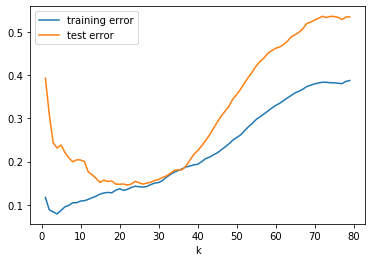

In [43]:
plotErrors(kRange, trainError,validError)

In [ ]:
#it sort of reminds plots from lecture so I assume this is working to some extent